## Observations and Insights 

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
#merged_df["Mouse ID"].value_counts()
merged_df["Mouse ID"].nunique()

249

In [37]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

In [38]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = merged_df.loc[merged_df["Mouse ID"] == "g989"]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [39]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df["Mouse ID"].isin(duplicate_df) == False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [42]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].value_counts()

a401    10
r554    10
j913    10
q597    10
a963    10
        ..
b447     1
h428     1
t573     1
v199     1
u153     1
Name: Mouse ID, Length: 248, dtype: int64

In [41]:
#checking data types of each dataframe column. 
clean_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#summary_group = clean_df.groupby("Drug Regimen")
regimen_group = clean_df[["Drug Regimen", "Tumor Volume (mm3)"]]
regimen_groupby = regimen_group.groupby("Drug Regimen")
regimen_groupby.head()

regimen_mean = regimen_groupby["Tumor Volume (mm3)"].mean()
regimen_median = regimen_groupby["Tumor Volume (mm3)"].apply(np.median)
regimen_variance = regimen_groupby["Tumor Volume (mm3)"].var()
#regimen_mode = regimen_groupby["Tumor Volume (mm3)"].apply(lambda x: x.mode().iloc[0])
regimen_sd = regimen_groupby["Tumor Volume (mm3)"].std()
regimen_sem = regimen_groupby["Tumor Volume (mm3)"].sem()


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_summary = pd.DataFrame({"Tumor Volume Mean": regimen_mean,
                                "Tumor Volume Median": regimen_median,
                                "Tumor Volume Variance": regimen_variance,
                                "Tumor Volume Std. Dev.": regimen_sd,
                                "Tumor Volume SEM": regimen_sem
                               })
regimen_summary
#https://stackoverflow.com/questions/48645354/obtain-mode-from-column-in-groupby



,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_aggregate = clean_df.groupby('Drug Regimen').agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
regimen_aggregate

#Link with details for aggregate method.
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

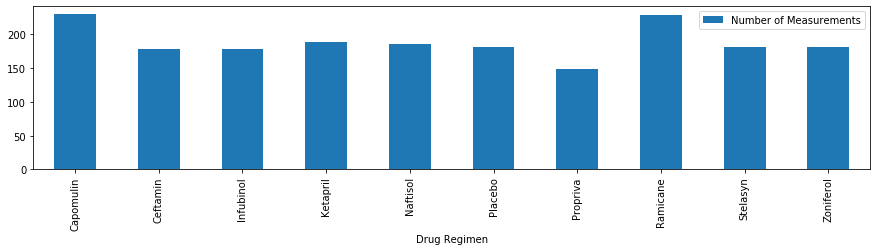

In [46]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements_group = clean_df[["Drug Regimen", "Timepoint"]]
measurements_groupby = measurements_group.groupby("Drug Regimen")
measurements_groupby.count()

#x_regimen = measurements_groupby["Drug Regimen"]
y_count = measurements_groupby["Timepoint"].count()

regimen_measurements = pd.DataFrame({"Number of Measurements": y_count})
regimen_measurements

#plot using pandas
regimen_measurements.plot(kind="bar", figsize=(15,3))
plt.show()


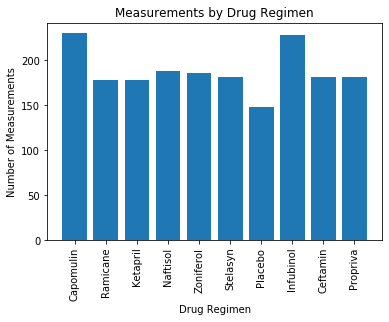

In [47]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = regimen_measurements.index
y_axis = regimen_measurements["Number of Measurements"]
plt.bar(x_axis, y_axis)
tick_location = [x for x in x_axis]
index_list = clean_df["Drug Regimen"].value_counts().index
plt.xticks(tick_location,index_list,rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.title("Measurements by Drug Regimen")
plt.show()


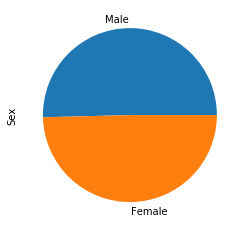

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_df[["Sex", "Mouse ID"]]
gender_group = gender_group.drop_duplicates(subset=["Mouse ID", "Sex"])
gender_groupby = gender_group.groupby("Sex")
gender_count = gender_group["Sex"].value_counts()
gender_count

gender_count.plot(kind="pie")

Text(0.5, 1.0, 'Gender of Mice')

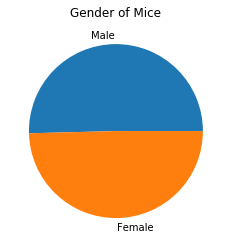

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = gender_group["Sex"].value_counts().index

# The values of each section of the pie chart
sizes = gender_group["Sex"].value_counts()

#Creates the pie chart based upon the values above
#plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.pie(sizes, labels=labels)
plt.title("Gender of Mice")


## Quartiles, Outliers and Boxplots

In [52]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_group = clean_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
timepoint_groupby = timepoint_group.groupby("Mouse ID")
timepoint_max = timepoint_groupby.max()
timepoint_max

#confirm timepoint max equals tumor volume max 
#clean_df.loc[(clean_df["Mouse ID"] == "a203") & (clean_df["Timepoint"]==45)]


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
joined_df = pd.merge(clean_df, timepoint_max, how="right", on=["Mouse ID", "Timepoint"])
renamed_df = joined_df.rename(columns={"Tumor Volume (mm3)_y": "Final Tumor Volume"})
del renamed_df["Tumor Volume (mm3)_x"]
renamed_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Final Tumor Volume
0,k403,Ramicane,Male,21,16,45,1,45.000000
1,s185,Capomulin,Female,3,17,45,1,45.000000
2,x401,Capomulin,Female,16,15,45,0,45.473753
3,m601,Capomulin,Male,22,17,45,1,45.000000
4,g791,Ramicane,Male,11,16,45,1,45.851531
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,0,45.934712
244,z435,Propriva,Female,12,26,10,0,48.710661
245,z581,Infubinol,Female,24,25,45,3,62.754451
246,z795,Naftisol,Female,13,29,45,3,65.741070


In [54]:
#Group clean dataframe by Mouse ID and find last value of both drug regimen and tumor volume.
promising_df=clean_df.groupby("Mouse ID").last()[["Drug Regimen", "Tumor Volume (mm3)"]]
# Put treatments into a list for for loop (and later for plot labels)
promising_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []
for treatment in promising_list:
    filtered=promising_df.loc[promising_df["Drug Regimen"]==treatment]
    #Calculating upper and lower quartiles and iqr
    quartiles = filtered["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    #determining potential outliers
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    iqr = upperq-lowerq
    #determining potential outliers
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    #add tumor volume to the list for the treatment/drug
    tumor_vol_list.append(filtered["Tumor Volume (mm3)"])
    #determine outliers using upper and lower bounds
    outlier=filtered.loc[(filtered["Tumor Volume (mm3)"]>upper_bound)|(filtered["Tumor Volume (mm3)"]<lower_bound)]
    #print(outlier)
    if len(outlier)>0: print(outlier)

         Drug Regimen  Tumor Volume (mm3)
Mouse ID                                 
c326        Infubinol           36.321346


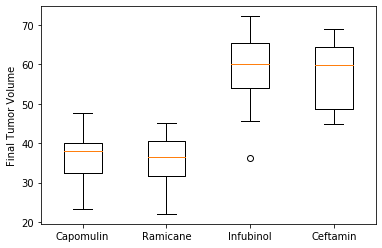

In [59]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_list)
#Add label for y-axis
plt.ylabel("Final Tumor Volume")
#Update ticks and x-axis to show the drug regimines 
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

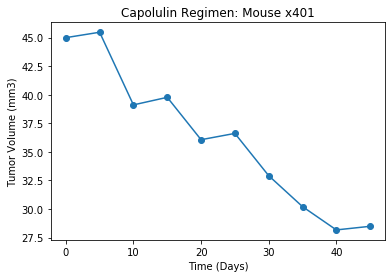

In [60]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Selected Mouse ID: x401

#Gather data for mouse treated with Capomulin. Selected x401 as the mouse to analyze.
mousex401 = clean_df.loc[clean_df["Mouse ID"] == "x401"]

#Plot the line chart with time time points on the x-axis and the tumor volume on the y-axis
plt.plot(mousex401["Timepoint"], mousex401["Tumor Volume (mm3)"], marker = "o")
plt.title("Capolulin Regimen: Mouse x401")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

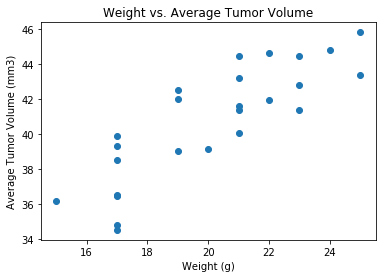

In [61]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Locate the data points for the Capomulin drug regimen/treatment
capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
#Find the average tumor volume for each mouse ID 
capomulin_groupby = capomulin.groupby("Mouse ID").mean()
capomulin_groupby

#define x and y axis as Weight and Tumor Volume respectively 
x = capomulin_groupby["Weight (g)"]
y = capomulin_groupby["Tumor Volume (mm3)"]

#Generate scatter plot and add labels
plt.scatter(x,y)
plt.title("Weight vs. Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between weight and tumor volume for the Capomulin regimen is 0.84


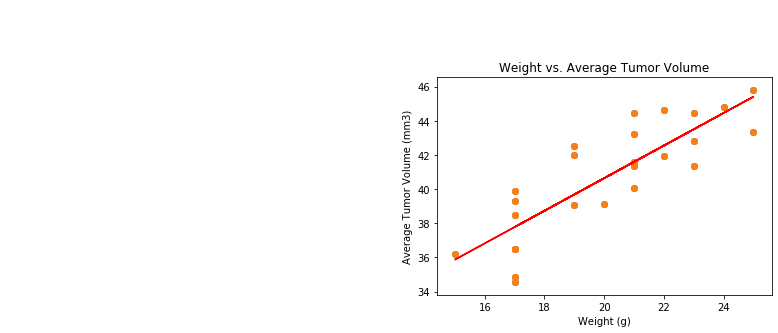

In [62]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(x,y)
print(f"The correlation between weight and tumor volume for the Capomulin regimen is {round(correlation[0],2)}")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

#Add labels to the scatter plot.
plt.scatter(x,y)
plt.title("Weight vs. Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()